<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminary work

In [37]:
# 0.0 Reset memory when repeating experiment
%reset -f

In [38]:
# We work both in python and R

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [39]:
# 0.1 Print output of mulitple commands in a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Call libraries
Install software and call libraries

In [40]:
# 1.0 Install libraries
!pip install catboost -q

In [41]:
%%R

# R packages install. Takes time..

install.packages("readr")
install.packages("vcd")   # For mosaic plots
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB


The downloaded source packages are in
	‘/tmp/RtmpYAuI0y/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/vcd_1.4-13.tar.gz'
Content type 'application/x-gzip' length 692042 bytes (675 KB)
downloaded 675 KB


The downloaded source packages are in
	‘/tmp/RtmpYAuI0y/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'
Content type 'application/x-gzip' length 1062844 bytes (1.0 MB)
downloaded 1.0 MB


The downloaded source packages are in
	‘/tmp/RtmpYAuI0y/downloaded_packages’


In [134]:
#1.1  Data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#1.2 Split data into X_train/X_test
from sklearn.model_selection import train_test_split

#1.3 For cross-validation and stratified k-fold partitions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#1.4 Encoders
#import category_encoders as ce

#1.5 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Pretty-print tabular data in Python, a
import tabulate

#1.6 Classifiers
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

#1.7 Hyperparameter search
from sklearn.model_selection import RandomizedSearchCV

#1.8 Classification reports
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# 1.9 Misc
from scipy.stats import loguniform

In [43]:
%%R

# Call R libraries
library(readr)
library(vcd)
library(gridExtra)

In [44]:
#1.8 Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Read/examine data

In [45]:
# 2.0 Mount my google drive at /gdrive
#from google.colab import drive
#drive.mount('/gdrive')

### Read and examine data

In [46]:
# 2.1 Read data from github repo
df=pd.read_csv('https://raw.githubusercontent.com/harnalashok/classification/refs/heads/main/data/airways_mod_ver4.csv')
df.head()
df.describe()
df.info()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lehane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


,age,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lehane
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,43.498000,163.035000,0.206000,0.104000,0.259000,0.173347,23.895350,16.935400,8.101800,1.9100,0.010000,1.826000
std,11.742823,11.470804,0.491738,0.305413,0.440583,0.378737,3.869877,1.592276,0.919566,0.6902,0.099549,0.714307
min,20.000000,132.000000,0.000000,0.000000,0.000000,0.000000,13.800000,12.500000,5.600000,1.0000,0.000000,1.000000
25%,34.000000,155.000000,0.000000,0.000000,0.000000,0.000000,21.400000,16.000000,7.500000,1.0000,0.000000,1.000000
50%,45.000000,163.000000,0.000000,0.000000,0.000000,0.000000,24.000000,17.000000,8.000000,2.0000,0.000000,2.000000
75%,54.000000,171.000000,0.000000,0.000000,1.000000,0.000000,26.525000,18.000000,8.600000,2.0000,0.000000,2.000000
max,64.000000,195.000000,3.000000,1.000000,2.000000,1.000000,37.000000,22.000000,11.000000,4.0000,1.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   sex                      1000 non-null   object 
 2   height                   1000 non-null   int64  
 3   subluxation of mandible  1000 non-null   int64  
 4   head and neck movement   1000 non-null   int64  
 5   buck teeth               1000 non-null   int64  
 6   edentulous               998 non-null    float64
 7   bmi                      1000 non-null   float64
 8   sternomental distance    1000 non-null   float64
 9   thyromental distance     1000 non-null   float64
 10  mallampatti              1000 non-null   int64  
 11  mouth opening            1000 non-null   int64  
 12  cormack lehane           1000 non-null   int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 101.7+ KB


### Streamline column names

In [47]:
#2.2 Remove leading/trailing spaces from col names
df.columns = df.columns.str.strip()
# Within a col name keep single space
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Replaces multiple spaces with a single space
df.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lehane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


### Drop NA rows

In [48]:
# 2.3
df.isna().sum()
# We have only two rows where edentulous is null.
df = df.dropna()
# Change the type of 'edentulous' from float64 to int64
df['edentulous'] = df['edentulous'].astype('int64')
df.dtypes

,0
age,0
sex,0
height,0
subluxation of mandible,0
head and neck movement,0
buck teeth,0
edentulous,2
bmi,0
sternomental distance,0
thyromental distance,0


,0
age,int64
sex,object
height,int64
subluxation of mandible,int64
head and neck movement,int64
buck teeth,int64
edentulous,int64
bmi,float64
sternomental distance,float64
thyromental distance,float64


In [49]:
#2.4 Map 'male' and 'female' to 1 and 0

df['sex'].value_counts()

mappings = {
            'female': 0,
            'male': 1
           }

df['sex'] = df['sex'].map(mappings)

df['sex'].value_counts()


,count
sex,
female,533
male,465


,count
sex,
0,533
1,465


In [50]:
#2.5 Our cat features and num features:
#    (Exclude cormack lahane)

cat_features = ['sex', 'buck teeth', 'edentulous', 'mallampatti', 'mouth opening', 'subluxation of mandible', 'head and neck movement']
num_features = ["age", "height", "bmi", "sternomental distance", "thyromental distance"]

In [51]:
#2.6 Number of unique values in our cat features:

df[cat_features].nunique()


,0
sex,2
buck teeth,3
edentulous,2
mallampatti,4
mouth opening,2
subluxation of mandible,4
head and neck movement,2


In [52]:
#2.7 Convert all cat-columns to 'int16' dtype
for col in cat_features:
    df[col] = df[col].astype('int16')

# Display the updated data types
df[cat_features].dtypes


,0
sex,int16
buck teeth,int16
edentulous,int16
mallampatti,int16
mouth opening,int16
subluxation of mandible,int16
head and neck movement,int16


In [53]:
#2.8 Distribution of target values
# Are classes balanced?
# (1 is mapped to 0, 2 to 1, 3 to 2 and 4 to 3:)

df['cormack lehane'].value_counts()

,count
cormack lehane,
2,557
1,324
3,84
4,33


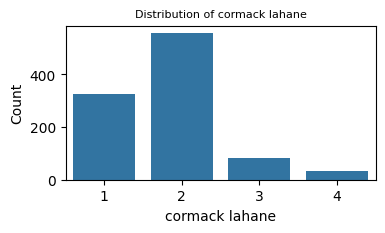

In [54]:
#2.9 Distribution of categories in cormack lahane:
_=plt.figure(figsize=(4, 2))
_=sns.countplot(x='cormack lehane', data=df)
_=plt.title('Distribution of cormack lahane', fontsize = 8)
_=plt.xlabel('cormack lahane')
_=plt.ylabel('Count')
_=plt.show()

## Feature engineering
(Experimental)

In [ ]:
encoder = ce.CatBoostEncoder(cols=["sex", "edentulous", "mouth opening", "head and neck movement"])
encoder.fit(X, y)
X_catEncoded = encoder.transform(X)

NameError: name 'X' is not defined

In [ ]:
X_catEncoded.head()

In [ ]:
df['bmi'].min()
df['bmi'].max()
(df['bmi'].max() - df['bmi'].min())/4


In [ ]:
df['height'].min()
df['height'].max()
(df['height'].max() - df['height'].min())/4


In [ ]:
bmi_cat = pd.cut(df["bmi"],
       bins=[13, 19, 25, 31, 38],
       labels=["0", "1", "2", "3"])

In [ ]:
height_cat = pd.cut(df["height"],
       bins=[130, 146, 162, 178, 195],
       labels=["0", "1", "2", "3"])

In [ ]:
bmi_cat = pd.DataFrame(bmi_cat)
bmi_cat.head()

In [ ]:
height_cat = pd.DataFrame(height_cat)
height_cat.head()

In [ ]:
bmi_cat.rename(columns = {'bmi':'bmi_cat'}, inplace = True)
bmi_cat.head()

In [ ]:
height_cat.rename(columns = {'height':'height_cat'}, inplace = True)
height_cat.head()

In [ ]:
df['bmi_cat'] = bmi_cat

In [ ]:
df['height_cat'] = height_cat

In [ ]:
df.head()

In [ ]:
dfc = df.copy()
y = dfc.pop('cormack lahane')
X = dfc




## Relationship between Categorical features
We will work with python/R and draw distribution/mosaic plots to understand relationships

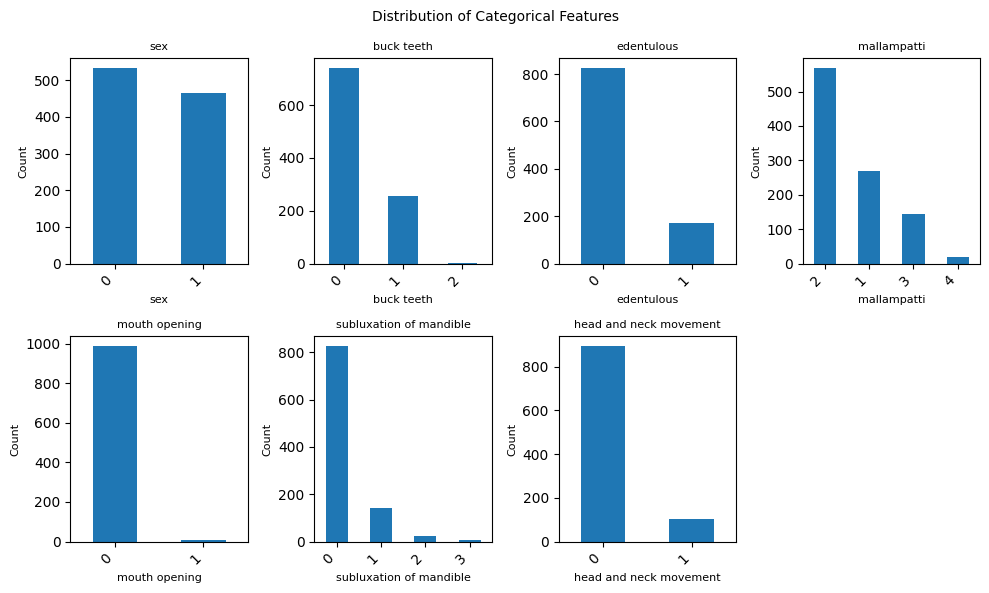

In [ ]:
# Distribution of categorical features:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
_=fig.suptitle('Distribution of Categorical Features', fontsize=10)

for i, col in enumerate(cat_features):
    ax = axes[i // 4, i % 4]
    _=df[col].value_counts().plot(kind='bar', ax=ax)
    _=ax.set_title(col, fontsize=8)
    _=ax.set_xlabel(col, fontsize=8)
    _=ax.set_ylabel('Count', fontsize=8)
    _=plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    if i == 6:
       _=plt.axis('off')

_=plt.tight_layout()
_=plt.show()

Observations: Gender has almost balanced distribution with females being higher in numbers. For ‘buck teeth’, level 2 is rare. For ‘mouth opening’ level 1 is rare, so also level 3 for ‘subluxation of mandible’.

In [ ]:
%%R

# Read R libraries
library(readr)
library(vcd)
library(gridExtra)

In [ ]:
%%R

# Read data in R dataframe
df_r <- read_csv("https://raw.githubusercontent.com/harnalashok/classification/refs/heads/main/data/airways_mod_ver4.csv")

# Rename columns
colnames(df_r) <- c("age", "sex", "height", "subluxation_of_mandible", "head_and_neck_movement",
                  "buck_teeth", "edentulous", "bmi", "sternomental_distance",
                  "thyromental_distance", "mallampatti", "mouth_opening", "cormack_lehane")
# Display few rows
head(df_r)

Rows: 1000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): sex
dbl (12): age, height, subluxation of mandible, head and neck movement, buck...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 13
    age sex    height subluxation_of_mandible head_and_neck_movement buck_teeth
  <dbl> <chr>   <dbl>                   <dbl>                  <dbl>      <dbl>
1    22 male      172                       1                      0          1
2    55 female    143                       1                      0          1
3    59 male      162                       2                      1          0
4    48 female    168                       1                      0          0
5    51 female    154                       3                      0          0
6    56 male      182                       1        

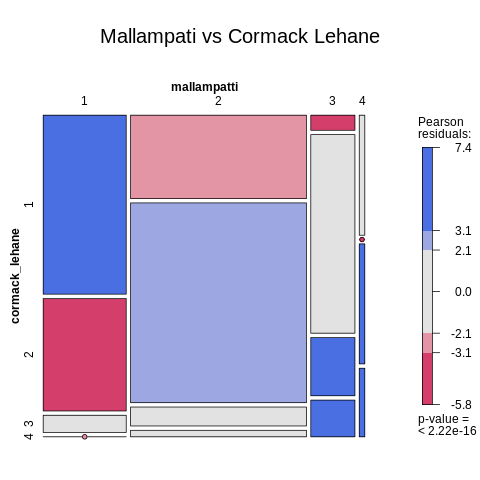

In [ ]:
%%R

# Mosaic plot of mallampatti vs cormacl lehane
art <- xtabs(~mallampatti + cormack_lehane, data = df_r)
mosaic(art, gp = shading_max, split_vertical = TRUE, main="Mallampati vs Cormack Lehane")


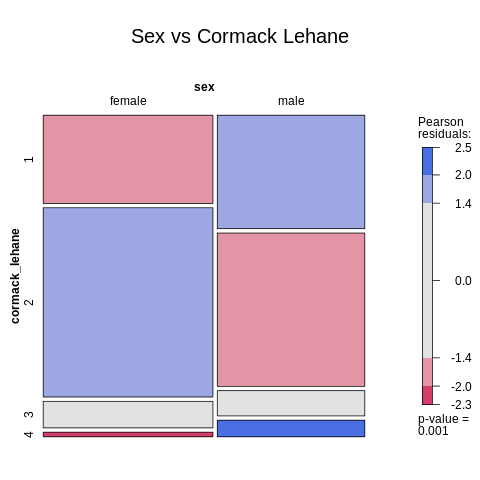

In [ ]:
%%R

# Mosaic plot of sex vs cormacl lehane
art <- xtabs(~sex + cormack_lehane, data = df_r)
mosaic(art, gp = shading_max, split_vertical = TRUE, main="Sex vs Cormack Lehane")

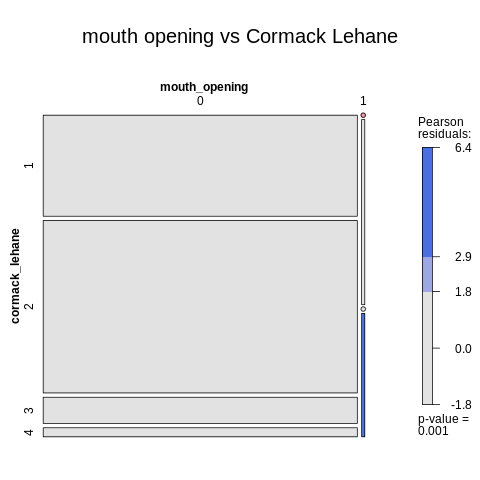

In [ ]:
%%R

# Mosaic plot of mouth_opening vs cormacl lehane
art <- xtabs(~mouth_opening + cormack_lehane, data = df_r)
mosaic(art, gp = shading_max, split_vertical = TRUE, main="mouth opening vs Cormack Lehane")

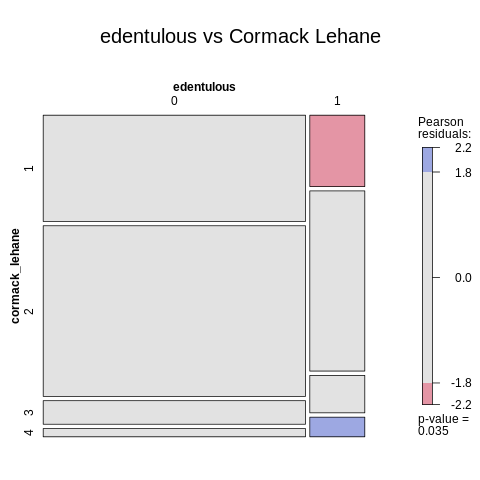

In [ ]:
%%R
# Mosaic plot of edentulous vs cormacl lehane
art <- xtabs(~edentulous + cormack_lehane, data = df_r)
mosaic(art, gp = shading_max, split_vertical = TRUE, main="edentulous vs Cormack Lehane")

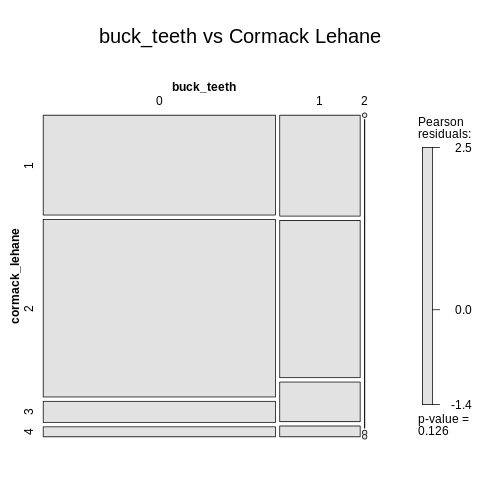

In [ ]:
%%R

# Mosaic plot of buck_teeth vs cormacl lehane
art <- xtabs(~buck_teeth + cormack_lehane, data = df_r)
mosaic(art, gp = shading_max, split_vertical = TRUE, main="buck_teeth vs Cormack Lehane")

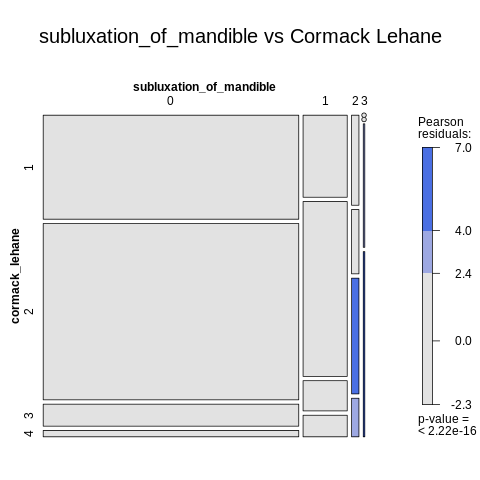

In [ ]:
%%R

# Mosaic plot of subluxation_of_mandible vs cormacl lehane
art <- xtabs(~subluxation_of_mandible + cormack_lehane, data = df_r)
mosaic(art, gp = shading_max, split_vertical = TRUE, main="subluxation_of_mandible vs Cormack Lehane")

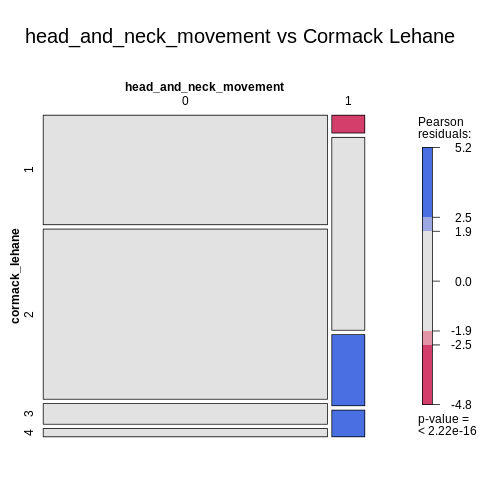

In [ ]:
%%R

# Mosaic plot of head_and_neck_movement vs cormacl lehane
art <- xtabs(~head_and_neck_movement + cormack_lehane, data = df_r)
mosaic(art, gp = shading_max, split_vertical = TRUE, main="head_and_neck_movement vs Cormack Lehane")


## Relationship between target and numeric features

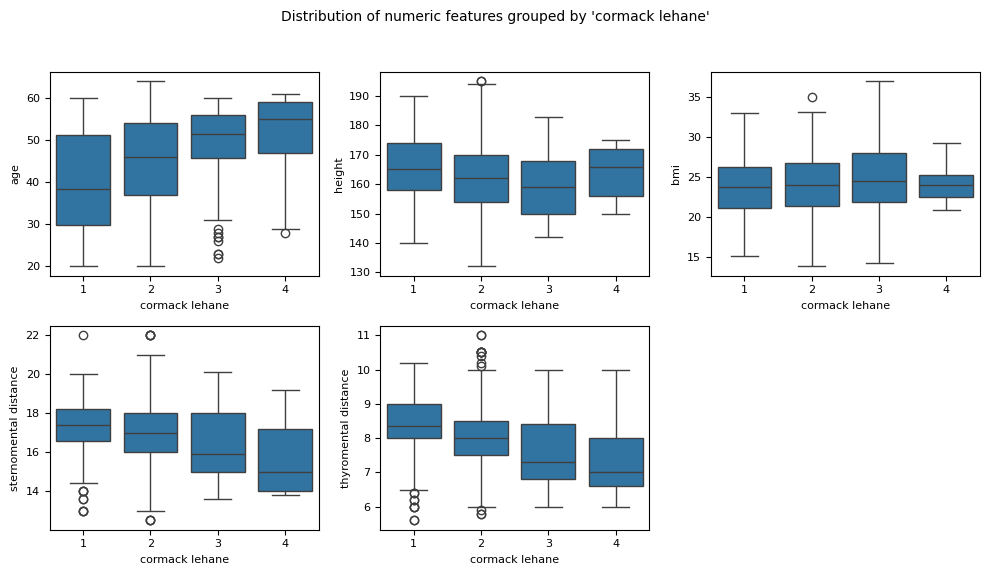

In [ ]:
# prompt: Consider the dataframe df. Draw box plots of all numeric features grouped by 'cormack lehane'. Plot them in a matrix of 2 X 3.. Keep the fontsize of labels to 8. Keep overall title as distribution of numeric features grouped by  'cormack lahane'. Delete the last unused axes


fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle("Distribution of numeric features grouped by 'cormack lehane'", fontsize=10)

for i, col in enumerate(num_features):
    ax = axes[i // 3, i % 3]
    _=sns.boxplot(x='cormack lehane', y=col, data=df, ax=ax)
    _=ax.set_xlabel('cormack lehane', fontsize=8)
    _=ax.set_ylabel(col, fontsize=8)
    _=ax.tick_params(axis='x', labelsize=8)
    _=ax.tick_params(axis='y', labelsize=8)


# Delete the last unused axes if necessary (adjust the index based on the number of numeric features)
if len(df[num_features].columns) < 6:
    for i in range(len(df[num_features].columns), 6):
      _=axes.flatten()[i].set_visible(False)


_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


In [ ]:
df.columns

Index(['age', 'sex', 'height', 'subluxation of mandible',
       'head and neck movement', 'buck teeth', 'edentulous', 'bmi',
       'sternomental distance', 'thyromental distance', 'mallampatti',
       'mouth opening', 'cormack lehane'],
      dtype='object')

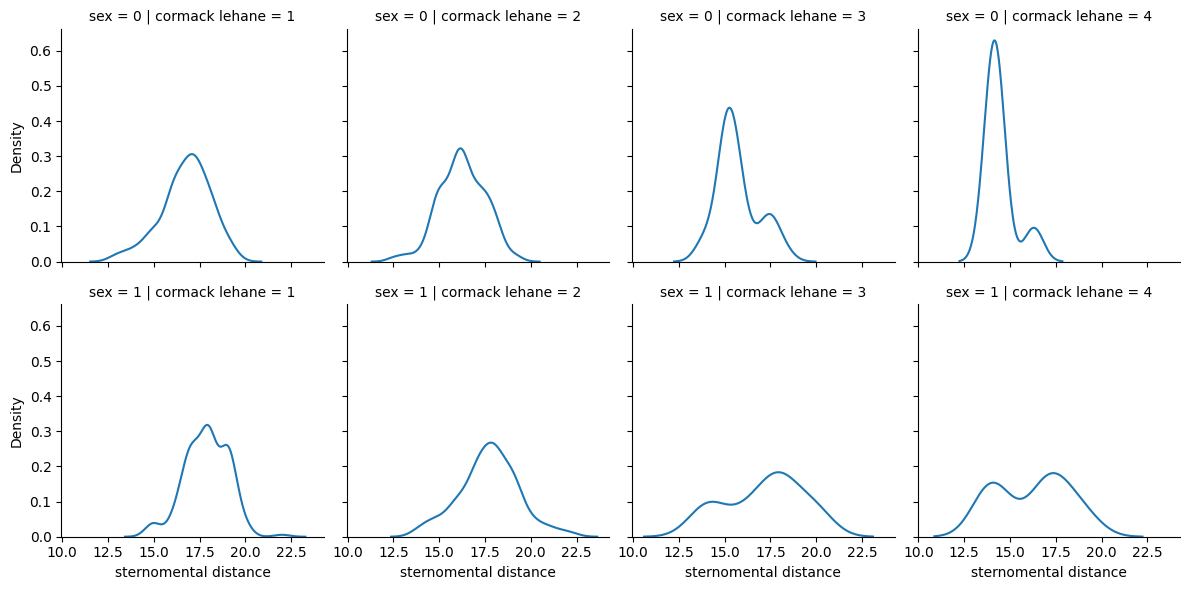

In [ ]:
g = sns.FacetGrid(df, col="cormack lehane", row = "sex")
g.map_dataframe(sns.kdeplot, x="sternomental distance")

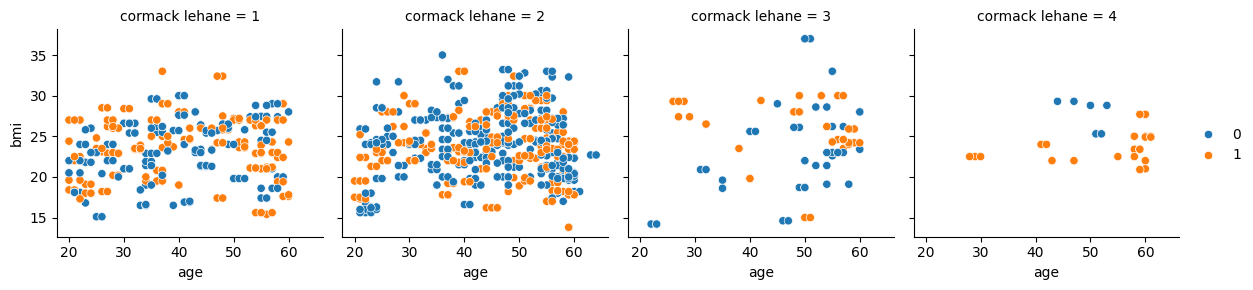

In [ ]:
g = sns.FacetGrid(df, col="cormack lehane")
g.map_dataframe(sns.scatterplot, x="age", y="bmi", hue="sex")
g.add_legend()

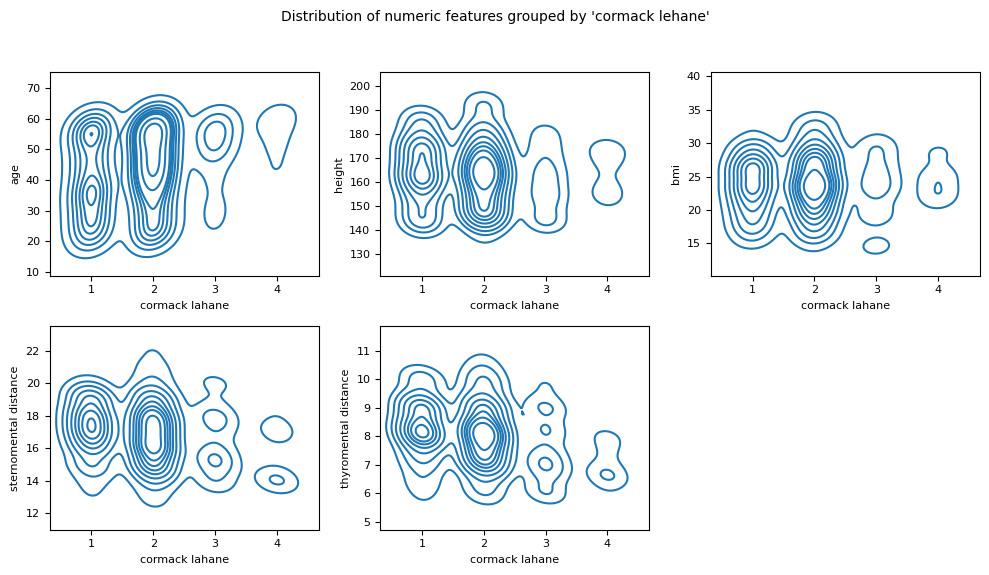

In [ ]:
# prompt: Consider the dataframe df. Draw box plots of all numeric features grouped by 'cormack lehane'. Plot them in a matrix of 2 X 3.. Keep the fontsize of labels to 8. Keep overall title as distribution of numeric features grouped by  'cormack lahane'. Delete the last unused axes


fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle("Distribution of numeric features grouped by 'cormack lehane'", fontsize=10)

for i, col in enumerate(num_features):
    ax = axes[i // 3, i % 3]
    _=sns.kdeplot(x='cormack lahane', y=col, data=df, ax=ax)
    _=ax.set_xlabel('cormack lahane', fontsize=8)
    _=ax.set_ylabel(col, fontsize=8)
    _=ax.tick_params(axis='x', labelsize=8)
    _=ax.tick_params(axis='y', labelsize=8)


# Delete the last unused axes if necessary (adjust the index based on the number of numeric features)
if len(df[num_features].columns) < 6:
    for i in range(len(df[num_features].columns), 6):
      _=axes.flatten()[i].set_visible(False)


_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


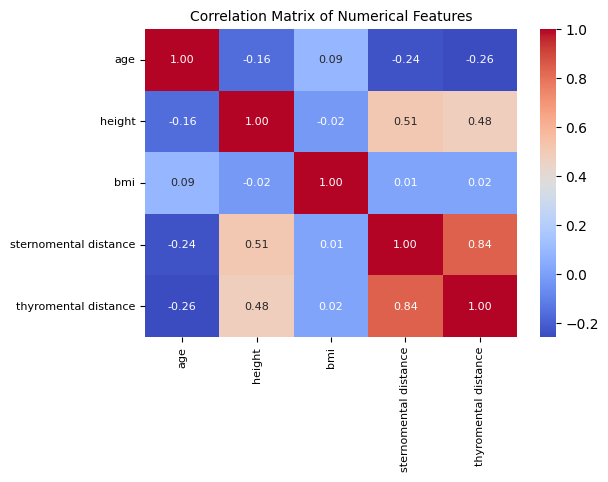

In [ ]:
# prompt: Write a program to visualize the correlation in df_num features and keep fontsize of labels be 8

_=plt.figure(figsize=(6, 4))
_=sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
_=plt.title('Correlation Matrix of Numerical Features', fontsize=10)
_=plt.xticks(fontsize=8)
_=plt.yticks(fontsize=8)
_=plt.show()


<Axes: xlabel='sternomental distance', ylabel='age'>

<Axes: xlabel='sternomental distance', ylabel='age'>

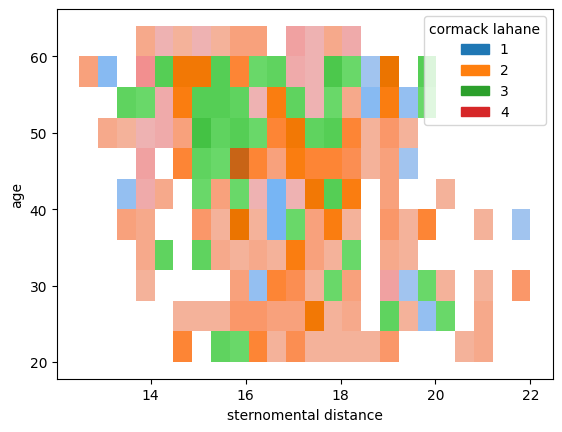

In [ ]:
sns.histplot(df_num, x="sternomental distance", y="age")
sns.histplot(df, x="sternomental distance", y="age", hue = 'cormack lahane')


In [ ]:
sum(df['thyromental distance'].notna() > 60)

0

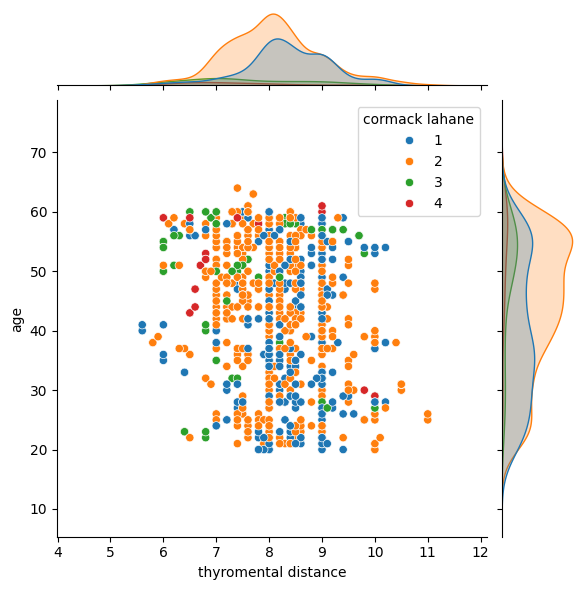

In [ ]:
dx = df[df['thyromental distance'] < 60]
sns.jointplot(data=dx, x="thyromental distance", y="age", hue = 'cormack lahane')

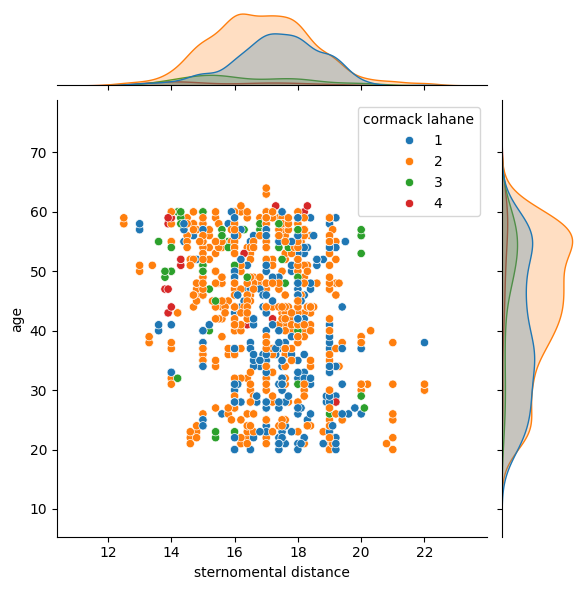

In [ ]:
sns.jointplot(data=df, x="sternomental distance", y="age", hue = 'cormack lahane', palette= "tab10")

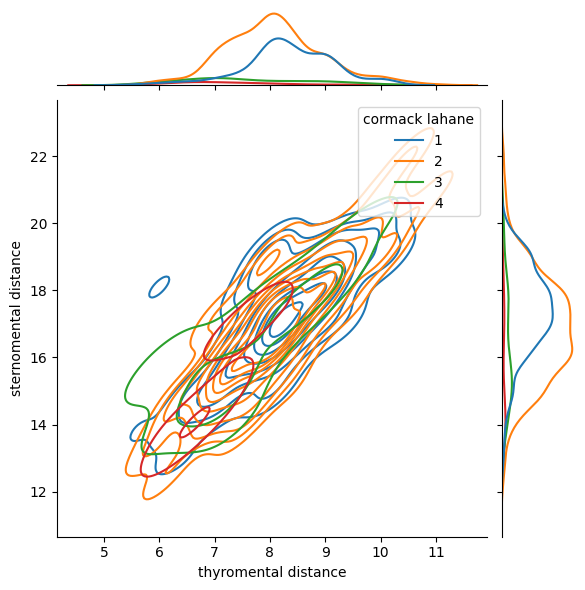

In [ ]:
dx = df[df['thyromental distance'] < 60]
ax = sns.jointplot(data=dx, x="thyromental distance",
              y="sternomental distance",
              hue = 'cormack lahane',
              kind = "kde",
              palette= "tab10")




## Modeling

### Split into X and y

In [55]:
#3.0 We keep a copy of our data
dfc = df.copy()

#3.1 Split dfc into target and predictors
y = dfc.pop('cormack lehane')
X = dfc

### Create dataframes to store results

In [56]:
# Our accuracy dataframe
# We will store 500 accuracy points/roc points per model
# (Repeated stratifiedKfold(cv=5), 100 times)
acc_array = pd.DataFrame(np.array(range(500)), columns = ["sno:"])
roc_array = pd.DataFrame(np.array(range(500)), columns = ["sno:"])

In [57]:
# Label encode cromack lahane

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
print(le.transform([1,2,3,4]))

[1 2 3 4]
[0 1 2 3]


In [58]:
# Split into train/test. We may need it at some places
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 stratify = y,
                                                 test_size = 0.20,
                                                 )

## RandomForest Repeated StratifiedKFold

In [ ]:
%%time

# Ref: https://stackoverflow.com/a/66022487

clf =  RandomForestClassifier(criterion='entropy',
                              n_estimators=200)


total_class0 = []
total_class1 = []
total_class2 = []
total_class3 = []
# To store, class-wise roc-data, for 100 attempts
all_roc_auc = []
# To store accuracy data for 100 attempts
total_acc_list = []
count = 1
# We take 5-random folds 100 times. So 500 trials
for i in range(100):
  # To store accuracy data averaged over all classes
  list_accu_stratified = []
  # Class-wise roc-data for each of the classes for five folds
  list_roc_auc = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]  # y is label encoded
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Use X_train, X_test, y_train, y_test to train/evaluate model in each fold
      clf.fit(X_train, y_train)
      # Get overall accuracy
      acc = clf.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      # Get AUC score for each class
      auc = roc_auc_score(y_test,
                          clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.87
Class-wise AUC: [0.9565812  0.95332792 0.99694293 0.98852702]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.85
Class-wise AUC: [0.92331112 0.92512175 0.96898104 0.95669874]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.89
Class-wise AUC: [0.97749288 0.95642271 0.8514947  0.99703923]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8743718592964824
Class-wise AUC: [0.97416762 0.96155815 0.9529735  1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8894472361809045
Class-wise AUC: [0.97520092 0.96657453 0.98820297 0.99050086]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test s

### AUC scores (randomforest modeling)

In [ ]:
# AUC data compilation (randomforest)
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
# Class-wise mean of AUCs
print("RandomForest--Class-wise mean of AUCs:" ,all_roc_auc_array.reshape(500,4).mean(axis=0))
# Class-wise std dev of AUCs
print("RandomForest--Class-wise std devs of AUCs:" ,all_roc_auc_array.reshape(500,4).std(axis=0))


(100, 5, 4)

RandomForest--Class-wise mean of AUCs: [0.96100318 0.95106536 0.96061206 0.98175253]
RandomForest--Class-wise std devs of AUCs: [0.01660863 0.01604777 0.03811412 0.04455177]


### AUC distribution plot (randomforest)

In [ ]:
# Classwise AUCs in 500 iterations (randomforest)
# Unlist the list
res =  [x for sublist in all_roc_auc for x in sublist]
# Store the resulting output in pandas Dataframe
roc_array['randomforest'] = res
# 'Explode' the list into class-wise columns
classwise_roc = roc_array['randomforest'].apply(pd.Series)
# Rename the columns
classwise_roc.columns = ['class1', 'class2', 'class3', 'class4']
classwise_roc.head()

,class1,class2,class3,class4
0,0.956581,0.953328,0.996943,0.988527
1,0.923311,0.925122,0.968981,0.956699
2,0.977493,0.956423,0.851495,0.997039
3,0.974168,0.961558,0.952973,1.000000
4,0.975201,0.966575,0.988203,0.990501


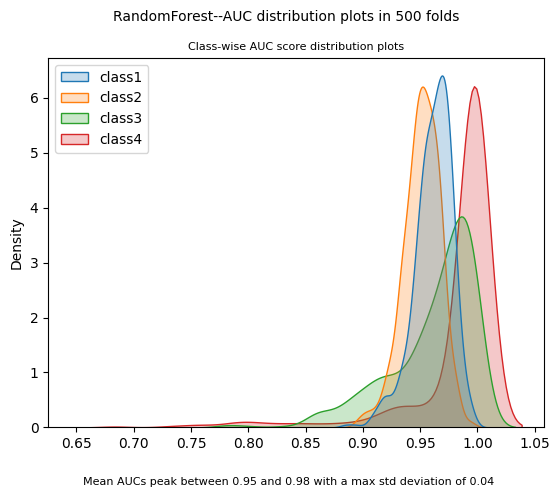

In [ ]:
# AUC distribution plots--500 in 500 folds (randomforest)
_=sns.kdeplot(classwise_roc, fill=True)
_=plt.suptitle("RandomForest--AUC distribution plots in 500 folds ", ha="center", fontsize=10)
_=plt.title("Class-wise AUC score distribution plots", ha="center", fontsize=8)
min = np.round(np.min(all_roc_auc_array.reshape(500,4).mean(axis=0)),2)
max = np.round(np.max(all_roc_auc_array.reshape(500,4).mean(axis=0)),2)
maxsd = np.round(np.max(all_roc_auc_array.reshape(500,4).std(axis=0)),2)
_=plt.figtext(0.5, -0.01, f"Mean AUCs peak between {min} and {max} with a max std deviation of {maxsd}",
              ha="center",
              fontsize=8)
_=plt.show()

### Accuracy distribution (randomforest modeling)

In [ ]:
print("===randomforest=====")
acc_array['randomforest'] = np.array(total_acc_list).flatten()
print("Overall Accuracy:", np.mean(acc_array['randomforest']))
print("Median Accuracy:", np.median(acc_array['randomforest']))
print("Std deviation of accuracy:", np.std(acc_array['randomforest']))
print("Class-wise avg AUC score :", all_roc_auc_array.reshape(500,4).mean(axis=0))
print("Class-wise avg std dev of AUCs :", all_roc_auc_array.reshape(500,4).std(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

===randomforest=====
Overall Accuracy: 0.881285879396985
Median Accuracy: 0.88
Std deviation of accuracy: 0.023665969622567964
Class-wise avg AUC score : [0.96100318 0.95106536 0.96061206 0.98175253]
Class-wise avg std dev of AUCs : [0.01660863 0.01604777 0.03811412 0.04455177]
(for classes 1,2,3,4 respectively)


### Distribution plot for accuracy (randomforest)

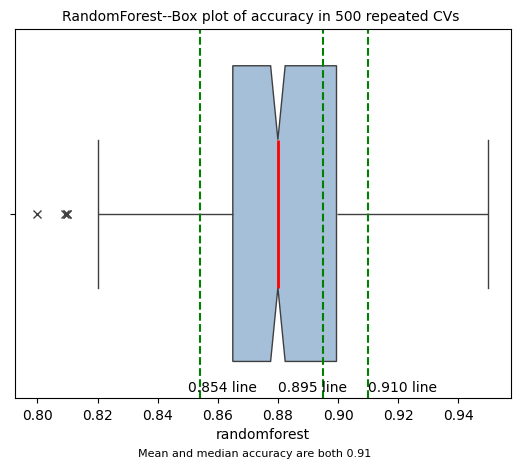

In [ ]:
# Accuracy box plot. How accuracy varies over CV trials (randomforest)
_=plt.title("RandomForest--Box plot of accuracy in 500 repeated CVs ", ha="center", fontsize=10)
ax=sns.boxplot(
            data=acc_array, x="randomforest",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )


_=ax.axvline(x=0.854, color='g', linestyle='--')
_=ax.axvline(x=0.91, color='g', linestyle='--')
_=ax.axvline(x=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.88,0.48, "0.895 line")
_=ax.text(0.91,0.48, "0.910 line")
_=ax.text(0.85,0.48, "0.854 line")

_=plt.figtext(0.5, -0.01, "Mean and median accuracy are both 0.91",
              ha="center",
              fontsize=8)
_=plt.show()

### precision/recall/f1 scores (randomforest modeling)

In [ ]:
# AUC data compilation (randomforest)
classification_scores = np.array(total_class0)
# Classwise AUCs in 500 iterations
# Unlist the list
res =  [x for sublist in classification_scores for x in sublist]
# Store the resulting output in pandas Dataframe
classification_array=pd.DataFrame()
classification_array['randomforest'] = res
# 'Explode' the list into class-wise columns
classwise_classification_scores = classification_array['randomforest'].apply(pd.Series)
# Rename the columns
classwise_classification_scores.columns = ['precision', 'recall', 'f1-score', 'support']
print("======")
print("Mean classification scores\n", classwise_classification_scores.mean())
print("======")
print("")
print("Std Dev of classification scores\n", classwise_classification_scores.std())
print("======")


Mean classification scores
 precision     0.894163
recall        0.849385
f1-score      0.870176
support      64.800000
dtype: float64

Std Dev of classification scores
 precision    0.041481
recall       0.049852
f1-score     0.035547
support      0.400401
dtype: float64


### precision/recall/f1 scores distribution plots

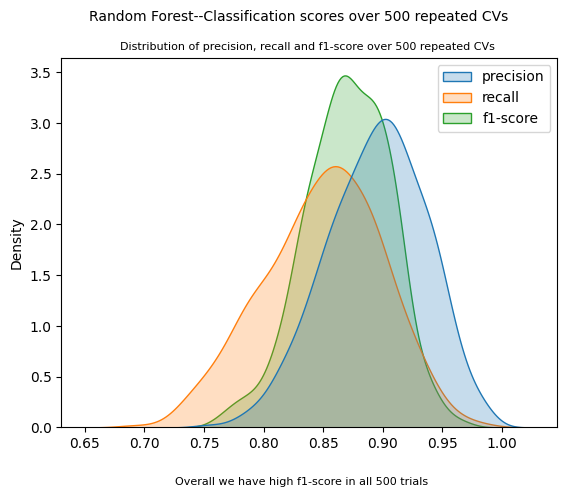

In [ ]:
# Classification scores plots--500 in 500 repeated CVs (randomforest)
_=sns.kdeplot(classwise_classification_scores[["precision", 	"recall", 	"f1-score"]], fill=True)
_=plt.suptitle("Random Forest--Classification scores over 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Distribution of precision, recall and f1-score over 500 repeated CVs ", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "Overall we have high f1-score in all 500 trials",
              ha="center",
              fontsize=8)
_=plt.show()

## Catboost Classifier

In [ ]:


X[cat_features].dtypes
X.shape



,0
sex,int64
buck teeth,int64
edentulous,int64
mallampatti,int64
mouth opening,int64
subluxation of mandible,int64
head and neck movement,int64


(998, 12)

In [ ]:
# Initialize and train the CatBoost Classifier
# Splitting the dataset into test & train

model = CatBoostClassifier(cat_features = cat_features )
model.fit(X_train, y_train)



In [ ]:
# Evaluate and predict
accuracy = model.score(X_test, y_test)
accuracy


np.float64(0.86)

## HistGBClassifier

In [ ]:

#categorical_features = df_cat.columns[:-1]
hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = cat_features,
                                                 learning_rate = 0.1,
                                                 #class_weight = 'balanced'
                                                 ).fit(X_train, y_train)



hist_classifier.score(X_test, y_test)


0.91

In [ ]:
scores = cross_val_score(hist_classifier, X, y, cv=5)
scores
scores.mean()

array([0.935     , 0.905     , 0.905     , 0.88944724, 0.89447236])

np.float64(0.90578391959799)

In [ ]:
from sklearn.inspection import permutation_importance
rh = permutation_importance(hist_classifier, X_test, y_test,
                           n_repeats=30,
                           random_state=0)



In [ ]:
for i in rh.importances_mean.argsort()[::-1]:
    if rh.importances_mean[i] - 2 * rh.importances_std[i] > 0:
        print(f"{df_ppd.columns[i]:<13}"
              f"{rh.importances_mean[i]:.3f}"
              f" +/- {rh.importances_std[i]:.3f}")

bmi          0.170 +/- 0.020
mallampatti  0.154 +/- 0.022
height       0.134 +/- 0.015
age          0.108 +/- 0.017
thyromental distance0.107 +/- 0.017
sternomental distance0.085 +/- 0.016
buck teeth   0.031 +/- 0.009
sex          0.026 +/- 0.009
head and neck movement0.021 +/- 0.005


In [ ]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits

import pandas as pd
from sklearn.model_selection import StratifiedKFold
import time

# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 min_samples_leaf = 15,
                                                 l2_regularization = 10,
                                                 categorical_features = cat_features,
                                                 learning_rate = 0.07,
                                                 #class_weight = 'balanced'
                                                 )

start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


In [ ]:
%%time


hist_classifier = HistGradientBoostingClassifier(
                                                 categorical_features = cat_features,
                                                 loss = 'log_loss',
                                                 )


param_grid = {
              "learning_rate": [0.01, 0.05, 0.1, 0.15],
              "min_samples_leaf": [5,10,15,20],
              "max_leaf_nodes": [7, 10, 15, 20,25,30,35, 40,45],
              "l2_regularization": [0.0007,0.001,0.002,0.003,0.005,0.01, 0.02],
              "max_features" : [0.5,0.6,0.7,0.8,0.9,1],
              "max_iter"     : [150,200,250,300,350]
             }

model_random_search = RandomizedSearchCV(hist_classifier,
                                       param_distributions=param_grid,
                                       n_jobs=-1,
                                       cv=5
                                       )

#model_grid_search = GridSearchCV(hist_classifier, param_grid=param_grid, n_jobs=2, cv=5)
model_random_search.fit(X_train, y_train)
hist_bst_param= model_random_search.best_params_
hist_bst_param


CPU times: user 2.09 s, sys: 182 ms, total: 2.27 s
Wall time: 45.2 s


{'max_leaf_nodes': 45,
 'max_features': 0.6,
 'learning_rate': 0.15,
 'l2_regularization': 0.005}

In [ ]:
%%time
# prompt: For the dataset df, and target column 'cormack lahane' write code for stratified k fold with 5 splits


# Assuming X and y are defined as in your previous code
# X = df_ppd.drop('cormack lahane', axis=1)
# y = df_ppd['cormack lahane']

skf = StratifiedKFold(n_splits=5,
                      shuffle=True)

hist_classifier = HistGradientBoostingClassifier(max_iter=hist_bst_param['max_iter'],
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 min_samples_leaf = hist_bst_param['min_samples_leaf'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )

start = time.time()
list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    hist_classifier.fit(X_train, y_train)
    print("Accuracy:", hist_classifier.score(X_test, y_test))
    list_accu_stratified.append(hist_classifier.score(X_test, y_test))
    auc = roc_auc_score(y_test,
                          hist_classifier.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
    print("Class-wise AUC:", auc)

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.895
Class-wise AUC: [0.97253561 0.96174919 0.95618207 0.99925981]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.92
Class-wise AUC: [0.97598805 0.96986607 0.99324976 0.98593634]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.915
Class-wise AUC: [0.95737892 0.95171576 0.92671167 0.99185788]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9095477386934674
Class-wise AUC: [0.92847302 0.94113432 0.98319328 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8743718592964824
Class-wise AUC: [0.93295063 0.93273956 0.88590821 1.        ]
Overall Accuracy: 0.9027839195979901
CPU times: user 16 s, sys: 503 ms, total: 16.5 s

In [ ]:
%%time

# Ref: https://stackoverflow.com/a/66022487

hist_classifier = HistGradientBoostingClassifier(max_iter=hist_bst_param['max_iter'],
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 min_samples_leaf = hist_bst_param['min_samples_leaf'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )


total_class0 = []
total_class1 = []
total_class2 = []
total_class3 = []
# To store, class-wise roc-data, for 100 attempts
all_roc_auc = []
# To store accuracy data for 100 attempts
total_acc_list = []
count = 1
# We take 5-random folds 100 times
for i in range(100):
  # To store accuracy data averaged over all classes
  list_accu_stratified = []
  # Class-wise roc-data for each of the classes for five folds
  list_roc_auc = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]  # y is label encoded
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Use X_train, X_test, y_train, y_test to train/evaluate model in each fold
      hist_classifier.fit(X_train, y_train)
      # Get overall accuracy
      acc = hist_classifier.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      # Get AUC score for each class
      auc = roc_auc_score(y_test,
                          hist_classifier.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc
      sk = classification_report(y_test, hist_classifier.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
Class-wise AUC: [0.96319088 0.96377841 0.94904891 0.99407846]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.905
Class-wise AUC: [0.97357537 0.96661932 0.9791064  0.99111769]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.86
Class-wise AUC: [0.94717949 0.93364713 0.94728383 1.        ]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9195979899497487
Class-wise AUC: [0.92743972 0.93447993 0.98513251 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9095477386934674
Class-wise AUC: [0.94362801 0.93540131 0.87653523 0.99740933]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test s

### AUC scores

In [ ]:
# AUC data compilation (histclassifier)
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
# Class-wise mean of AUCs
print("HistClassifier--Class-wise mean of AUCs    :" ,all_roc_auc_array.reshape(500,4).mean(axis=0))
# Class-wise std dev of AUCs
print("HistClassifier--Class-wise std devs of AUCs:" ,all_roc_auc_array.reshape(500,4).std(axis=0))


(100, 5, 4)

HistClassifier--Class-wise mean of AUCs: [0.95440747 0.94453817 0.95162512 0.97630743]


### AUC distribution plot (HistClassifier)

In [ ]:
# Classwise AUCs in 500 iterations (histclassifier)
# Unlist the list
res =  [x for sublist in all_roc_auc for x in sublist]
# Store the resulting output in pandas Dataframe
roc_array['histclassifier'] = res
# 'Explode' the list into class-wise columns
classwise_roc = roc_array['histclassifier'].apply(pd.Series)
# Rename the columns
classwise_roc.columns = ['class1', 'class2', 'class3', 'class4']
classwise_roc.head()

,class1,class2,class3,class4
0,0.963191,0.963778,0.949049,0.994078
1,0.973575,0.966619,0.979106,0.991118
2,0.947179,0.933647,0.947284,1.000000
3,0.927440,0.934480,0.985133,1.000000
4,0.943628,0.935401,0.876535,0.997409


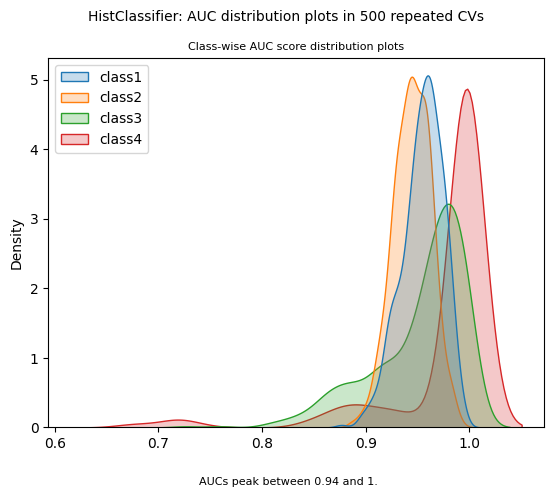

In [ ]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees)
_=sns.kdeplot(classwise_roc, fill=True)
_=plt.suptitle("HistClassifier: AUC distribution plots in 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Class-wise AUC score distribution plots", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "AUCs peak between 0.94 and 1.",
              ha="center",
              fontsize=8)
_=plt.show()

In [ ]:
# Mean accuracy scores over CV trials (extratrees)
print("===HistClassifier=====")
acc_array['histclassifier'] = np.array(total_acc_list).flatten()
print("Mean Accuracy:", np.mean(acc_array['histclassifier']))
print("Median Accuracy:", np.median(acc_array['histclassifier']))
print("Std deviation of accuracy:", np.std(acc_array['histclassifier']))
print("Class-wise avg AUC scores :", all_roc_auc_array.mean(axis=0).mean(axis=0))
print("Class-wise std dev of AUC scores :", all_roc_auc_array.mean(axis=0).std(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

===HistClassifier=====
Mean Accuracy: 0.8893806532663318
Median Accuracy: 0.8897236180904522
Std deviation of accuracy: 0.024530248928303494
Class-wise avg AUC scores : [0.95440747 0.94453817 0.95162512 0.97630743]
(for classes 1,2,3,4 respectively)


### Accuracy distribution

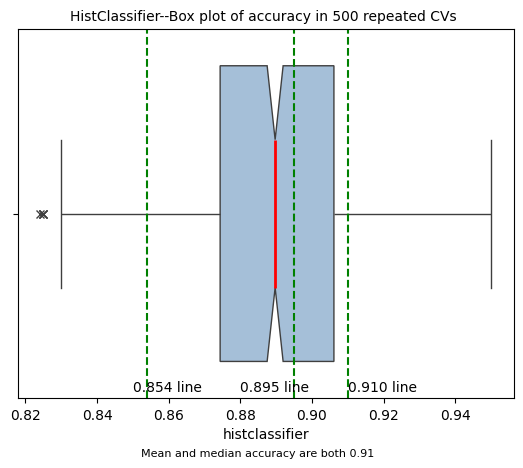

In [ ]:
# Accuracy box plot. How accuracy varies over CV trials (extratrees)
_=plt.title("HistClassifier--Box plot of accuracy in 500 repeated CVs ", ha="center", fontsize=10)
ax=sns.boxplot(
            data=acc_array, x="histclassifier",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )


_=ax.axvline(x=0.854, color='g', linestyle='--')
_=ax.axvline(x=0.91, color='g', linestyle='--')
_=ax.axvline(x=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.88,0.48, "0.895 line")
_=ax.text(0.91,0.48, "0.910 line")
_=ax.text(0.85,0.48, "0.854 line")

_=plt.figtext(0.5, -0.01, "Mean and median accuracy are both 0.91",
              ha="center",
              fontsize=8)
_=plt.show()

### Precision/recall/f1 scores

In [ ]:
# AUC data compilation (histclassifier)-----CHANGE &&&&&&$$$$$$$$$$
classification_scores = np.array(total_class0)
# Classwise AUCs in 500 iterations
# Unlist the list
res =  [x for sublist in classification_scores for x in sublist]
# Store the resulting output in pandas Dataframe
classification_array=pd.DataFrame()
classification_array['histclassifier'] = res
# 'Explode' the list into class-wise columns
classwise_classification_scores = classification_array['histclassifier'].apply(pd.Series)
# Rename the columns
classwise_classification_scores.columns = ['precision', 'recall', 'f1-score', 'support']
print("======")
print("Mean classification scores\n", classwise_classification_scores.mean())
print("======")
print("")
print("Std Dev of classification scores\n", classwise_classification_scores.std())
print("======")


Mean classification scores
 precision     0.903066
recall        0.892142
f1-score      0.896722
support      64.800000
dtype: float64

Std Dev of classification scores
 precision    0.036907
recall       0.043851
f1-score     0.030183
support      0.400401
dtype: float64


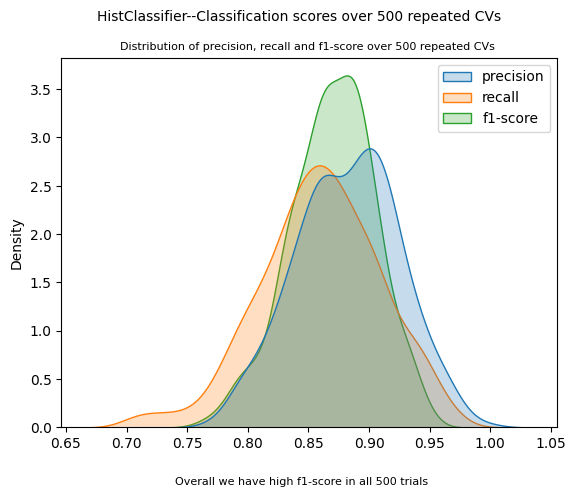

In [ ]:
# AUC distribution plots--500 in 500 repeated CVs (histclassifier)
_=sns.kdeplot(classwise_classification_scores[["precision", 	"recall", 	"f1-score"]], fill=True)
_=plt.suptitle("HistClassifier--Classification scores over 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Distribution of precision, recall and f1-score over 500 repeated CVs ", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "Overall we have high f1-score in all 500 trials",
              ha="center",
              fontsize=8)
_=plt.show()

## ExtraTrees

In [59]:
%%time

# Ref: https://stackoverflow.com/a/66022487

clf = ExtraTreesClassifier(criterion="entropy",
                           n_estimators=400,
                           max_depth=None,
                           min_samples_split=2,
                           )

# Store (cormack lehane) classwise classification-report
# over all 100 repeated n_split trials
total_class0 = []  # [class0] * 100
total_class1 = []  # [[['precision', 'recall', 'f1-score', 'support'] * n_splits ] *100]
total_class2 = []  # [class2] * 100
total_class3 = []  # [class3] * 100
# To store, class-wise roc-data, for 100 attempts
all_roc_auc = []
# To store accuracy data for 100 attempts
total_acc_list = []
count = 1
# We take 5-random folds 100 times
for i in range(100):
  # To store accuracy data averaged over all classes
  list_accu_stratified = []
  # Class-wise roc-data for each of the classes for five folds
  list_roc_auc = []
  # Classwise classification report per cross-validation
  class0 = []  # class0: [['precision', 'recall', 'f1-score', 'support'] * n_splits ]
  class1 = []  # class1: [['precision', 'recall', 'f1-score', 'support'] * n_splits ]
  class2 = []  # class2: [['precision', 'recall', 'f1-score', 'support'] * n_splits ]
  class3 = []  # class3: [['precision', 'recall', 'f1-score', 'support'] * n_splits ]
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  # Iterate 5-times ie once per split
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]  # y is label encoded
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Use X_train, X_test, y_train, y_test to train/evaluate model in each fold
      clf.fit(X_train, y_train)
      # Get overall accuracy
      acc = clf.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      # Get AUC score for each class
      auc = roc_auc_score(y_test,
                          clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc
      sk = classification_report(y_test,
                                 clf.predict(X_test),
                                 output_dict = True  # dict format and not tabular format
                                 )
      # sk['0'].values(): ['precision', 'recall', 'f1-score', 'support']
      #                   for class-0 of cormack lehane
      class0.append(list(sk['0'].values()))
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.905
Class-wise AUC: [0.98433048 0.98229505 0.97707201 0.98519615]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.885
Class-wise AUC: [0.9765625  0.96438718 0.96994536 0.99703923]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.915
Class-wise AUC: [0.94786325 0.94948881 0.99871424 1.        ]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9346733668341709
Class-wise AUC: [0.97456946 0.97379197 0.99531351 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9095477386934674
Class-wise AUC: [0.97416762 0.96432228 0.96622495 0.99913644]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_tes

In [66]:
# Just check shapes of our data collectors
# n_splits: 5
# Repeated n_splits:100
# No of classes: 4
# No of classification scores: 4 (precision/recall/f1/support)

# Classification reports
np.array(class0).shape                 # (5x4)       [For everyone of n_splits, one report]
np.array(total_class0).shape           # (100, 5, 4)
# AUC
np.array(list_roc_auc).shape           # (5X4)       [For everyone of n_splits, AUC over all 4 classes]
np.array(all_roc_auc).shape            # (100, 5, 4)
# Accuracy
np.array(list_accu_stratified).shape   # (5,)        [Mean accuracy over every one of n_splits]
np.array(total_acc_list).shape         # (100,5)

(5, 4)

(100, 5, 4)

(5, 4)

(100, 5, 4)

(5,)

(100, 5)

### AUC scores (ExtraTrees modeling)

In [71]:
# AUC data compilation (extratrees)
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
# Class-wise mean of AUCs
print("ExtraTrees--Class-wise mean of AUCs:    " ,all_roc_auc_array.reshape(500,4).mean(axis=0))
# Class-wise std dev of AUCs
print("ExtraTrees--Class-wise std devs of AUCs:" ,all_roc_auc_array.reshape(500,4).std(axis=0))

(100, 5, 4)

ExtraTrees--Class-wise mean of AUCs:     [0.96904571 0.96272055 0.97692975 0.98905305]
ExtraTrees--Class-wise std devs of AUCs: [0.01383517 0.01326817 0.02577767 0.03078377]


### AUC distribution plot (extratrees modeling)

In [78]:
# Classwise AUCs in 500 iterations (extratrees)
# Unlist the list
res =  [x for sublist in all_roc_auc for x in sublist]
# Store the resulting output in pandas Dataframe
roc_array['extratrees'] = res
# 'Explode' the list into class-wise columns
classwise_roc = roc_array['extratrees'].apply(pd.Series)
# Rename the columns
classwise_roc.columns = ['class1', 'class2', 'class3', 'class4']
print("              Class-wise AUCs")
classwise_roc.head()

              Class-wise AUCs


,class1,class2,class3,class4
0,0.984330,0.982295,0.977072,0.985196
1,0.976562,0.964387,0.969945,0.997039
2,0.947863,0.949489,0.998714,1.000000
3,0.974569,0.973792,0.995314,1.000000
4,0.974168,0.964322,0.966225,0.999136


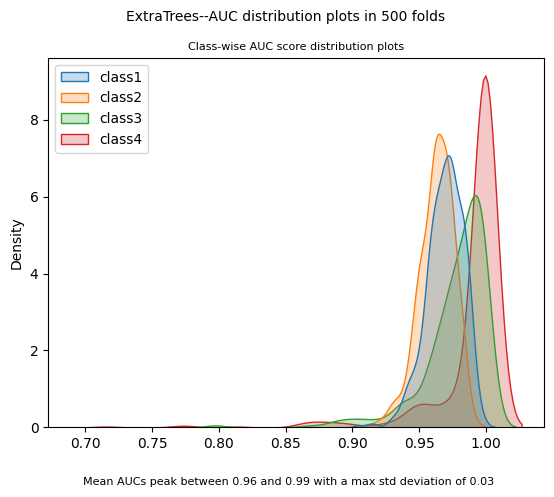

In [79]:
# AUC distribution plots--500 folds (Extratrees)
_=sns.kdeplot(classwise_roc, fill=True)
_=plt.suptitle("ExtraTrees--AUC distribution plots in 500 folds ", ha="center", fontsize=10)
_=plt.title("Class-wise AUC score distribution plots", ha="center", fontsize=8)
min = np.round(np.min(all_roc_auc_array.reshape(500,4).mean(axis=0)),2)
max = np.round(np.max(all_roc_auc_array.reshape(500,4).mean(axis=0)),2)
maxsd = np.round(np.max(all_roc_auc_array.reshape(500,4).std(axis=0)),2)
_=plt.figtext(0.5, -0.01, f"Mean AUCs peak between {min} and {max} with a max std deviation of {maxsd}",
              ha="center",
              fontsize=8)
_=plt.show()

### Accuracy distribution (extratrees)


In [81]:
# Mean accuracy scores over CV trials (extratrees)
print("===ExtraTrees=====")
acc_array['extratrees'] = np.array(total_acc_list).flatten()
print("Mean Accuracy                  :", np.mean(acc_array['extratrees']))
print("Median Accuracy                :", np.median(acc_array['extratrees']))
print("Std deviation of accuracy      :", np.std(acc_array['extratrees']))
print("Class-wise avg AUC score       :", all_roc_auc_array.reshape(500,4).mean(axis=0))
print("Class-wise avg std dev of AUCs :", all_roc_auc_array.reshape(500,4).std(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

===ExtraTrees=====
Mean Accuracy                  : 0.9094507537688441
Median Accuracy                : 0.91
Std deviation of accuracy      : 0.021211046174961935
Class-wise avg AUC score       : [0.96904571 0.96272055 0.97692975 0.98905305]
Class-wise avg std dev of AUCs : [0.01383517 0.01326817 0.02577767 0.03078377]
(for classes 1,2,3,4 respectively)


### Distribution plot for accuracy (ExtraTrees)


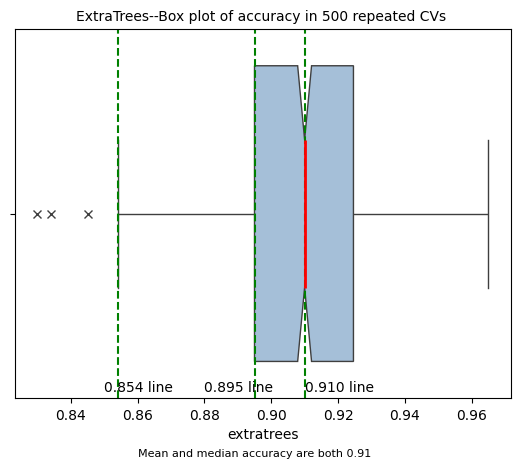

In [82]:
# Accuracy box plot. How accuracy varies over CV trials (extratrees)
_=plt.title("ExtraTrees--Box plot of accuracy in 500 repeated CVs ", ha="center", fontsize=10)
ax=sns.boxplot(
            data=acc_array, x="extratrees",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )


_=ax.axvline(x=0.854, color='g', linestyle='--')
_=ax.axvline(x=0.91, color='g', linestyle='--')
_=ax.axvline(x=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.88,0.48, "0.895 line")
_=ax.text(0.91,0.48, "0.910 line")
_=ax.text(0.85,0.48, "0.854 line")

_=plt.figtext(0.5, -0.01, "Mean and median accuracy are both 0.91",
              ha="center",
              fontsize=8)
_=plt.show()

### precision/recall/f1 scores (ExtraTrees modeling)

In [92]:
# Classification scores (extratrees)
classification_scores = np.array(total_class0)

# Unlist the list
res =  [x for sublist in classification_scores for x in sublist]
# Store the resulting output in pandas Dataframe
classification_array=pd.DataFrame()
classification_array['extratrees'] = res

# 'Explode' the list into columns
classwise_classification_scores = classification_array['extratrees'].apply(pd.Series)

# Rename the columns
classwise_classification_scores.columns = ['precision', 'recall', 'f1-score', 'support']
print("======")
print(f"Mean classification scores\n\n{classwise_classification_scores.mean()}")
print("======")
print("")
print(f"Std Dev of classification scores\n\n{classwise_classification_scores.std()}")
print("======")


Mean classification scores

precision     0.901669
recall        0.885770
f1-score      0.892669
support      64.800000
dtype: float64

Std Dev of classification scores

precision    0.037908
recall       0.045582
f1-score     0.030075
support      0.400401
dtype: float64


### precision/recall/f1 scores distribution plots (extratrees)

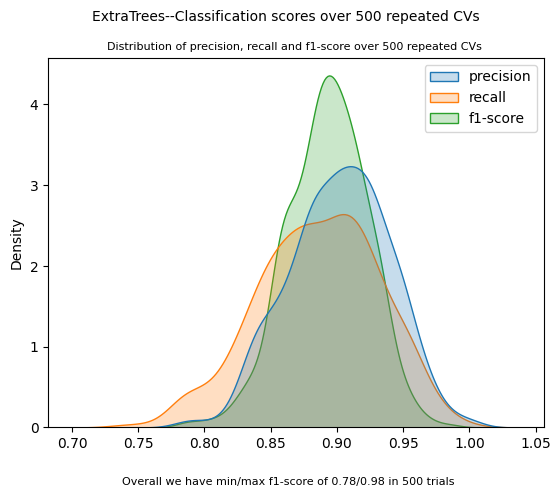

In [101]:
# Classification score distribution plots--500 in 500 repeated CVs (extratrees)
_=sns.kdeplot(classwise_classification_scores[["precision", 	"recall", 	"f1-score"]], fill=True)
_=plt.suptitle("ExtraTrees--Classification scores over 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Distribution of precision, recall and f1-score over 500 repeated CVs ", ha="center", fontsize=8)
f1_min = np.round(classwise_classification_scores['f1-score'].min(),2)
f1_max = np.round(classwise_classification_scores['f1-score'].max(),2)
_=plt.figtext(0.5, -0.01, f"Overall we have min/max f1-score of {f1_min}/{f1_max} in 500 trials",
              ha="center",
              fontsize=8)
_=plt.show()

## Permutation feature importance
ExtraTrees modeling

In [128]:
# Splitting the dataset into test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Our model
clf = ExtraTreesClassifier(criterion="entropy",
                           n_estimators=400,
                           max_depth=None,
                           min_samples_split=2,
                           )
clf.fit(X_train, y_train)

# Calculate permutation importance with test data
# We permute each feature 40 times
etr = permutation_importance(clf, X_test, y_test,
                             n_repeats=40)




ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [129]:
# Data collectors
# Feature names
cols = []
# Feature impt
etr_mean = []
# Feature impt std dev
etr_std = []

print("Extent of degradation of accuracy score")
print("=======================================\n")
for i in etr.importances_mean.argsort()[::-1]:
    if etr.importances_mean[i] - 2 * etr.importances_std[i] > 0:
        print(f"{df.columns[i]:<13}\t\t\t"
              f"{etr.importances_mean[i]:.3f}"
              f" +/- {etr.importances_std[i]:.3f}")
        cols.append(df.columns[i])
        etr_mean.append(np.round(etr.importances_mean[i],2))
        etr_std.append(np.round(etr.importances_std[i],2))
print("===============")

Extent of degradation of accuracy score

mallampatti  			0.187 +/- 0.023
age          			0.105 +/- 0.020
bmi          			0.097 +/- 0.014
sex          			0.097 +/- 0.020
thyromental distance			0.095 +/- 0.017
buck teeth   			0.081 +/- 0.014
height       			0.079 +/- 0.014
sternomental distance			0.071 +/- 0.013
edentulous   			0.050 +/- 0.013
head and neck movement			0.047 +/- 0.011
subluxation of mandible			0.045 +/- 0.014


In [130]:
# Tabulate above results
# Ref: https://pypi.org/project/tabulate/
from tabulate import tabulate
table = [cols, etr_mean, etr_std]
print("                                                       Extent of degradation of accuracy score")
print(tabulate(table, showindex = ["cols=>", "mean", "std"], tablefmt = 'grid'))

                                                       Extent of degradation of accuracy score
+--------+-------------+------+------+------+----------------------+------------+--------+-----------------------+------------+------------------------+-------------------------+
| cols=> | mallampatti | age  | bmi  | sex  | thyromental distance | buck teeth | height | sternomental distance | edentulous | head and neck movement | subluxation of mandible |
+--------+-------------+------+------+------+----------------------+------------+--------+-----------------------+------------+------------------------+-------------------------+
| mean   | 0.19        | 0.11 | 0.1  | 0.1  | 0.09                 | 0.08       | 0.08   | 0.07                  | 0.05       | 0.05                   | 0.05                    |
+--------+-------------+------+------+------+----------------------+------------+--------+-----------------------+------------+------------------------+-------------------------+
| std    |

In [132]:
# Plot function for permutation importance
# Ref: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

def plot_permutation_importance(etr, X, y, ax):
    perm_sorted_idx = etr.importances_mean.argsort()
    tick_labels_dict = {"tick_labels": X.columns[perm_sorted_idx]}
    ax.boxplot(etr.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

<Axes: >

<Axes: >

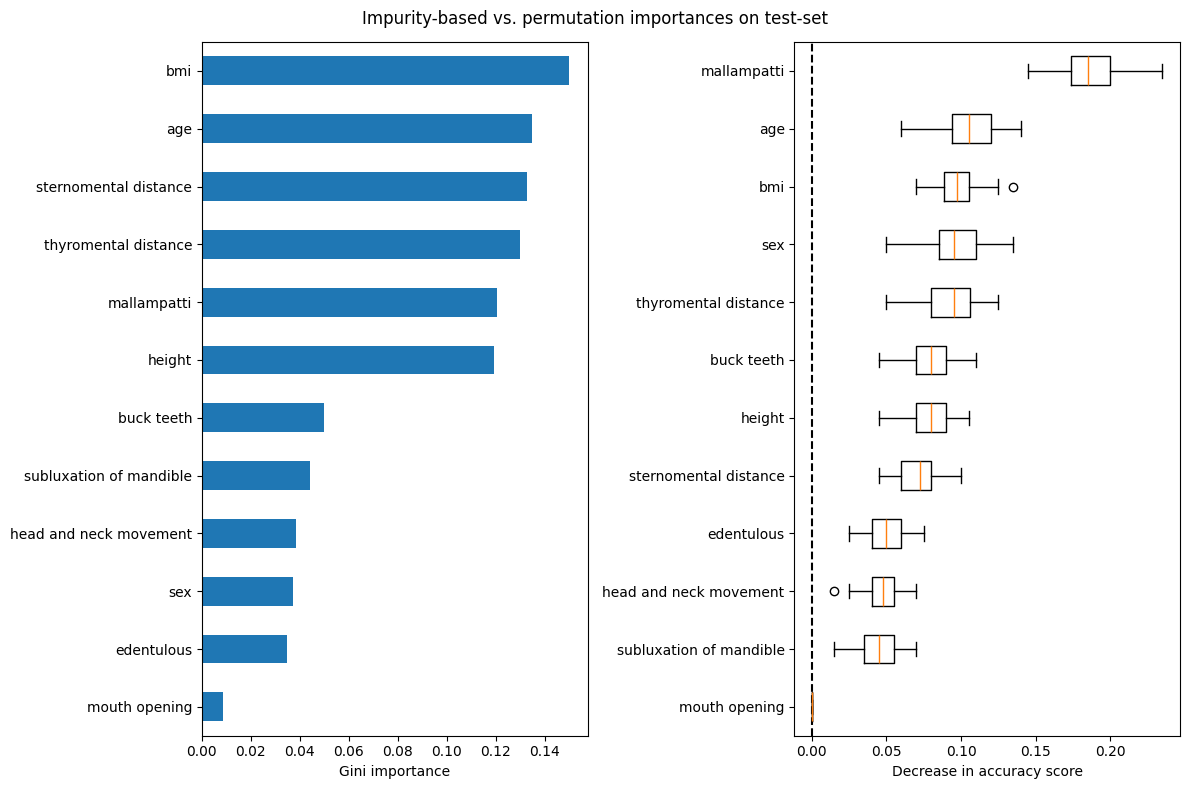

In [133]:
# Plot impurity based and permutaion based importances
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Impurity based importance plot
mdi_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
mdi_importances.sort_values().plot.barh(ax=ax1)
_=ax1.set_xlabel("Gini importance")

# Permutation importance plot
plot_permutation_importance(etr, X_test, y_test, ax2)
_=ax2.set_xlabel("Decrease in accuracy score")

_=fig.suptitle(
    "Impurity-based vs. permutation importances on test-set"
)
_ = fig.tight_layout()

## XGBoost classifier

In [ ]:
%%time

# Took 30 minutes
# Search for the best xgboost parameters using Randomized cv search
from sklearn.metrics import accuracy_score
xgb_classifier = XGBClassifier(
                                objective='binary:logistic',
                                eval_metric = accuracy_score,
                                n_jobs = 16
                               )

# Consider these parameters:
param_grid = {
              "booster" : ['gbtree', 'dart', 'gblinear'],
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
              "n_estimators" : [200, 250,300,350],
              "max_depth" : [3,4,5,6,7,8,9],
              "grow_policy" : ['depthwise', 'lossguide'],
              "colsample_bytree" : [0.5,0.7,0.9,1.0],
              "reg_lambda": loguniform(1e-4, 1e-2),
              "reg_alpha" : loguniform(1e-4, 1e-2),
              "gamma" : loguniform(1e-4, 1e-2),
             }

# Evaluate over 100 points in the search space
# Best fitted model is returned
model_random_search = RandomizedSearchCV(xgb_classifier,
                                         param_distributions=param_grid,
                                         n_jobs=-1,
                                         n_iter = 100,
                                         cv=5
                                        )


model_random_search.fit(X_train, y_train)
xgb_bst_param= model_random_search.best_params_
xgb_bst_param


In [143]:
# Best fitted model's performance:
model_random_search.score(X_test,y_test)  # 0.8592964824120602

0.8542713567839196

In [145]:
%%time
# The accuracy with the best parameters:

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42)

xgb_clf = XGBClassifier(booster = xgb_bst_param['booster'],
                        max_depth = xgb_bst_param['max_depth'],
                        n_estimators=xgb_bst_param['n_estimators'],
                        grow_policy = xgb_bst_param['grow_policy'],
                        colsample_bytree = xgb_bst_param['colsample_bytree'],
                        reg_lambda = xgb_bst_param['reg_lambda'],
                        reg_alpha = xgb_bst_param['reg_alpha'],
                        gamma =xgb_bst_param['gamma'],
                        learning_rate= xgb_bst_param['learning_rate'],
                        objective='binary:logistic',
                        )


list_accu_stratified = []
count = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("=======")
    print("fold:", count ) ; count = count +1
    print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
    # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
    xgb_clf.fit(X_train, y_train)
    print("Accuracy:", xgb_clf.score(X_test, y_test))
    list_accu_stratified.append(xgb_clf.score(X_test, y_test))
    auc = roc_auc_score(y_test,
                          xgb_clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
    print("Class-wise AUC:", auc)

print("========")
print("Overall Accuracy:", np.mean(list_accu_stratified))
print("========")


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.895
Class-wise AUC: [0.94917379 0.94054383 0.94293478 0.99407846]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
Class-wise AUC: [0.96897978 0.96002435 0.98264224 0.96817172]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.875
Class-wise AUC: [0.94358974 0.93541856 0.89456766 0.98593634]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9045226130653267
Class-wise AUC: [0.93226177 0.93099918 0.97446671 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.8542713567839196
Class-wise AUC: [0.92698048 0.92659705 0.90497738 0.99740933]
Overall Accuracy: 0.8857587939698492
CPU times: user 4min, sys: 1.39 s, total: 4min 1s

## Voting classifier

In [ ]:
%%time

from sklearn.ensemble import  VotingClassifier



xgb_clf = XGBClassifier(booster = xgb_bst_param['booster'],
                        max_depth = xgb_bst_param['max_depth'],
                        n_estimators=200,
                        grow_policy = xgb_bst_param['grow_policy'],
                        colsample_bytree = xgb_bst_param['colsample_bytree'],
                        reg_lambda = xgb_bst_param['reg_lambda'],
                        reg_alpha = xgb_bst_param['reg_alpha'],
                        gamma =xgb_bst_param['gamma'],
                        learning_rate= xgb_bst_param['learning_rate'],
                        objective='binary:logistic',
                        #enable_categorical = True
                        )

extra_clf = ExtraTreesClassifier(n_estimators=150,
                           max_depth=None,
                           min_samples_split=2,
                           )

hist_classifier  = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 #class_weight = 'balanced'
                                                 )

#rf_classifier = RandomForestClassifier(n_estimators=400)


eclf = VotingClassifier(estimators=[
                                    ('hist', hist_classifier),
                                    ('extra', extra_clf),
                                    #('rf', rf_classifier)
                                    ],
                         voting='soft')



total_acc_list = []
total_class0  = []
total_class1 = []
total_class2 = []
total_class3 = []
count = 1
for i in range(50):
  print("=========")
  print("ITERATION", i)
  print("=========")

  list_accu_stratified = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True)

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      eclf.fit(X_train, y_train)
      print("Accuracy:", eclf.score(X_test, y_test))
      list_accu_stratified.append(eclf.score(X_test, y_test))
      sk = classification_report(y_test, eclf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)



ITERATION 0
fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.89
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.875
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.914572864321608
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9246231155778895
ITERATION 1
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.91
fold: 7
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.875
fold: 8
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.86
fold: 9
X_train shape: (799,

In [ ]:
print("========")
acc_array = np.array(total_acc_list)
acc_array.shape  # (50,5)
print("Overall Accuracy:", np.mean(acc_array))
print("Median Accuracy:", np.median(acc_array))
print("Std deviation of accuracy:", np.std(acc_array))
print("========")

(50, 5)

Overall Accuracy: 0.895751055276382
Median Accuracy: 0.895
Std deviation of accuracy: 0.023006834126292453


<Axes: xlabel='accuracy'>

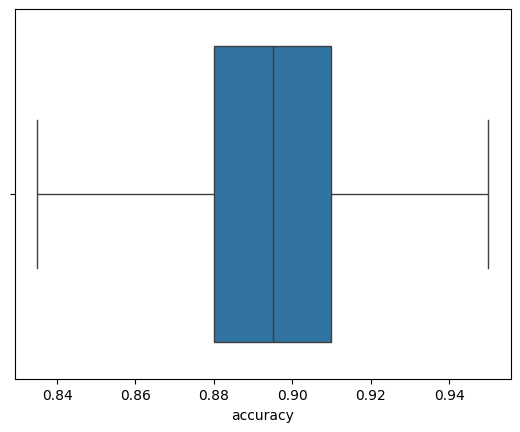

In [ ]:
acc = pd.DataFrame(acc_array.flatten(), columns = ["accuracy"])
sns.boxplot(data=acc, x="accuracy")


<Axes: xlabel='accuracy', ylabel='Density'>

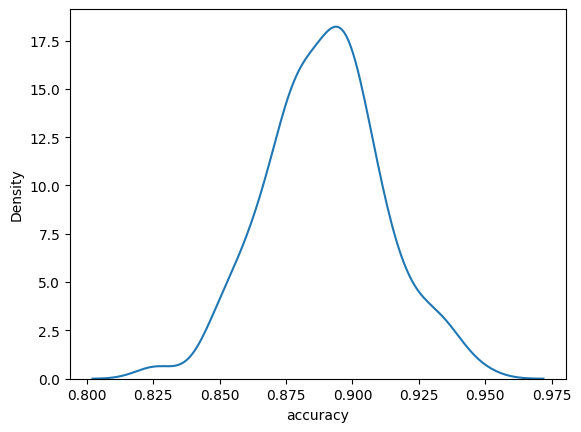

In [ ]:
sns.kdeplot(data=acc, x="accuracy")

## Stacking Classifier

In [ ]:
%%time


xgb_clf = XGBClassifier(booster = xgb_bst_param['booster'],
                        max_depth = xgb_bst_param['max_depth'],
                        n_estimators=200,
                        grow_policy = xgb_bst_param['grow_policy'],
                        colsample_bytree = xgb_bst_param['colsample_bytree'],
                        reg_lambda = xgb_bst_param['reg_lambda'],
                        reg_alpha = xgb_bst_param['reg_alpha'],
                        gamma =xgb_bst_param['gamma'],
                        learning_rate= xgb_bst_param['learning_rate'],
                        objective='binary:logistic',
                        )


extra_clf = ExtraTreesClassifier(criterion = 'entropy',n_estimators=150,
                           max_depth=None,
                           min_samples_split=2,
                           )


hist_classifier = HistGradientBoostingClassifier(max_iter=400,
                                                 max_leaf_nodes=  hist_bst_param['max_leaf_nodes'],
                                                 l2_regularization = hist_bst_param['l2_regularization'],
                                                 categorical_features = cat_features,
                                                 learning_rate = hist_bst_param['learning_rate'],
                                                 max_features = hist_bst_param['max_features'],
                                                 )


extra_clf1 = ExtraTreesClassifier(n_estimators=350,
                                  max_depth=None,
                                  min_samples_split=2,
                                  )


sclf = StackingClassifier(estimators=[('xgb', xgb_clf),
                                      ('hist', hist_classifier),
                                       ('extra', extra_clf)],
                         final_estimator= extra_clf1,
                         n_jobs = -1,
                         passthrough = True,
                         cv = 5,
                         stack_method = 'predict_proba')

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
sclf.fit(X_train, y_train)

print(classification_report(y_test,
                      sclf.predict(X_test),
                      output_dict = True
                      ))

print("Accuracy:", sclf.score(X_test, y_test))


{'0': {'precision': 0.8780487804878049, 'recall': 0.935064935064935, 'f1-score': 0.9056603773584906, 'support': 77.0}, '1': {'precision': 0.8904109589041096, 'recall': 0.9285714285714286, 'f1-score': 0.9090909090909091, 'support': 140.0}, '2': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 24.0}, '3': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 9.0}, 'accuracy': 0.896, 'macro avg': {'precision': 0.9421149348479786, 'recall': 0.7992424242424242, 'f1-score': 0.8536878216123498, 'support': 250.0}, 'weighted avg': {'precision': 0.9010691613765452, 'recall': 0.896, 'f1-score': 0.8936343053173241, 'support': 250.0}}
Accuracy: 0.896
CPU times: user 2.18 s, sys: 287 ms, total: 2.47 s
Wall time: 34.3 s


## END

## Rough Work

### Repeated StratifiedKFold
But with [catboost encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html) and alse see [here](https://contrib.scikit-learn.org/category_encoders/index.html)

In [ ]:
!pip install category_encoders -q

In [ ]:
%%time
import category_encoders as ce
clf = ExtraTreesClassifier(criterion = "log_loss",
                           n_estimators=400,
                           max_depth=None,
                           min_samples_split=2,
                           #class_weight = 'balanced',
                           #ccp_alpha = 0.0005
                           )

total_class0 = []
total_class1 = []
total_class2 = []
total_class3 = []
all_roc_auc  = []
total_acc_list = []
count = 1
for i in range(100):
  list_accu_stratified = []
  list_roc_auc = []
  class0  = []    # [['precision', 'recall', 'f1-score', 'support'] ....]
  class1 = []
  class2 = []
  class3 = []
  skf = StratifiedKFold(n_splits=5,
                        shuffle=True,
                        random_state = None
                        )
  #count = 1
  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]   # y is label encoded
      encoder = ce.CatBoostEncoder(cols=["sex", "edentulous",
                                         "mouth opening", "head and neck movement"]
                                   )
      encoder.fit(X_train, y_train)
      X_train = encoder.transform(X_train)
      X_test = encoder.transform(X_test)
      print("=======")
      print("fold:", count ) ; count = count +1
      print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
      print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)
      # Now you can use X_train, X_test, y_train, y_test for training and evaluating your model in each fold
      clf.fit(X_train, y_train)
      acc = clf.score(X_test, y_test)
      print("Accuracy:", acc)
      list_accu_stratified.append(acc)
      auc = roc_auc_score(y_test,
                          clf.predict_proba(X_test),
                          multi_class='ovr',
                          average = None)
      print("Class-wise AUC:", auc)
      list_roc_auc.append(auc) # One-vs-rest auc
      sk = classification_report(y_test, clf.predict(X_test), output_dict = True)
      class0.append(list(sk['0'].values()))  # [['precision', 'recall', 'f1-score', 'support']...]
      class1.append(list(sk['1'].values()))
      class2.append(list(sk['2'].values()))
      class3.append(list(sk['3'].values()))

  total_acc_list.append(list_accu_stratified)
  total_class0.append(class0)
  total_class1.append(class1)
  total_class2.append(class2)
  total_class3.append(class3)
  all_roc_auc.append(list_roc_auc)


fold: 1
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.88
Class-wise AUC: [0.96934473 0.96377841 0.99490489 0.99851962]
fold: 2
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.9
Class-wise AUC: [0.96065028 0.95058847 0.97332048 0.99851962]
fold: 3
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test shape: (200,)
Accuracy: 0.92
Class-wise AUC: [0.96364672 0.96522927 0.99614272 1.        ]
fold: 4
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9095477386934674
Class-wise AUC: [0.96515499 0.95679771 0.99450549 1.        ]
fold: 5
X_train shape: (799, 12) y_train shape: (799,)
X_test shape: (199, 12) y_test shape: (199,)
Accuracy: 0.9547738693467337
Class-wise AUC: [0.97726751 0.97292179 0.98691015 1.        ]
fold: 6
X_train shape: (798, 12) y_train shape: (798,)
X_test shape: (200, 12) y_test sh

In [ ]:
# AUC data compilation (extratrees_catboost_enc)
all_roc_auc_array = np.array(all_roc_auc)
all_roc_auc_array.shape
# Class-wise mean of AUCs
print("ExtraTrees-catencoded--Class-wise mean of AUCs:" ,all_roc_auc_array.mean(axis=0).mean(axis=0))

(100, 5, 4)

Class-wise mean of AUCs: [0.96894044 0.96209302 0.97599309 0.98861535]


In [ ]:
# Classwise AUCs in 500 iterations (extratrees_catboost_enc)
# Unlist the list
res =  [x for sublist in all_roc_auc for x in sublist]
# Store the resulting output in pandas Dataframe
roc_array['extratrees_catboost_enc'] = res
# 'Explode' the list into class-wise columns
classwise_roc = roc_array['extratrees_catboost_enc'].apply(pd.Series)
# Rename the columns
classwise_roc.columns = ['class1', 'class2', 'class3', 'class4']
classwise_roc.head()

,class1,class2,class3,class4
0,0.969345,0.963778,0.994905,0.99852
1,0.960650,0.950588,0.973320,0.99852
2,0.963647,0.965229,0.996143,1.00000
3,0.965155,0.956798,0.994505,1.00000
4,0.977268,0.972922,0.986910,1.00000


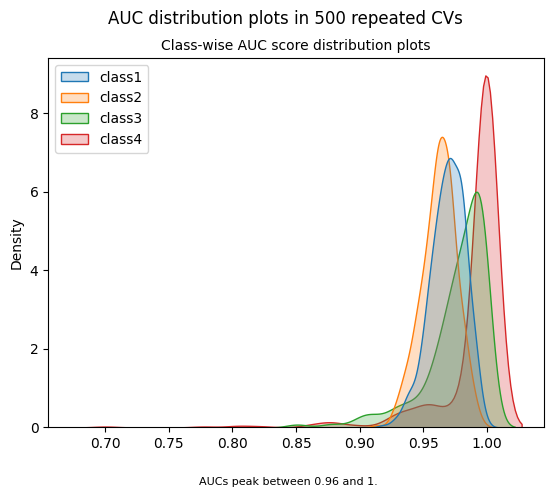

In [ ]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees_catboost_enc)
_=sns.kdeplot(classwise_roc, fill=True)
_=plt.suptitle("ExtraTrees-catencoded--AUC distribution plots in 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Class-wise AUC score distribution plots", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "AUCs peak between 0.96 and 1.",
              ha="center",
              fontsize=8)
_=plt.show()

In [ ]:
# Mean accuracy scores over CV trials (extratrees_catboost_enc)
print("===ExtraTrees-catencoded--=====")
acc_array['extratrees_catboost_enc'] = np.array(total_acc_list).flatten()
print("Mean Accuracy:", np.mean(acc_array['extratrees_catboost_enc']))
print("Median Accuracy:", np.median(acc_array['extratrees_catboost_enc']))
print("Std deviation of accuracy:", np.std(acc_array['extratrees_catboost_enc']))
print("Class-wise avg AUC scores :", all_roc_auc_array.mean(axis=0).mean(axis=0))
print("(for classes 1,2,3,4 respectively)")
print("========")

Mean Accuracy: 0.9101030150753768
Median Accuracy: 0.91
Std deviation of accuracy: 0.022623969202489443
Class-wise avg AUC scores : [0.96894044 0.96209302 0.97599309 0.98861535]
(for classes 1,2,3,4 respectively)


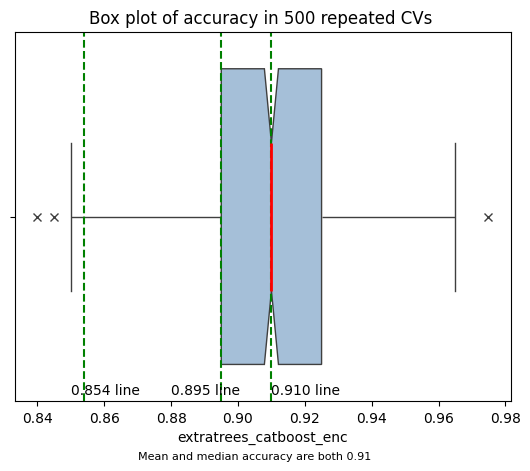

In [ ]:
# Accuracy box plot. How accuracy varies over CV trials (extratrees_catboost_enc)
_=plt.title("ExtraTrees-catencoded--Box plot of accuracy in 500 repeated CVs ", ha="center", fontsize=10)
ax=sns.boxplot(
            data=acc_array, x="extratrees_catboost_enc",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )


_=ax.axvline(x=0.854, color='g', linestyle='--')
_=ax.axvline(x=0.91, color='g', linestyle='--')
_=ax.axvline(x=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.88,0.48, "0.895 line")
_=ax.text(0.91,0.48, "0.910 line")
_=ax.text(0.85,0.48, "0.854 line")

_=plt.figtext(0.5, -0.01, "Mean and median accuracy are both 0.91",
              ha="center",
              fontsize=8)
_=plt.show()

In [ ]:
# AUC data compilation (extratrees_catboost_enc)
classification_scores = np.array(total_class0)
# Classwise AUCs in 500 iterations
# Unlist the list
res =  [x for sublist in classification_scores for x in sublist]
# Store the resulting output in pandas Dataframe
classification_array=pd.DataFrame()
classification_array['extraTrees_catboost_enc'] = res
# 'Explode' the list into class-wise columns
classwise_classification_scores = classification_array['extraTrees_catboost_enc'].apply(pd.Series)
# Rename the columns
classwise_classification_scores.columns = ['precision', 'recall', 'f1-score', 'support']
classwise_classification_scores.head(2)


,precision,recall,f1-score,support
0,0.910714,0.784615,0.842975,65.0
1,0.878788,0.906250,0.892308,64.0


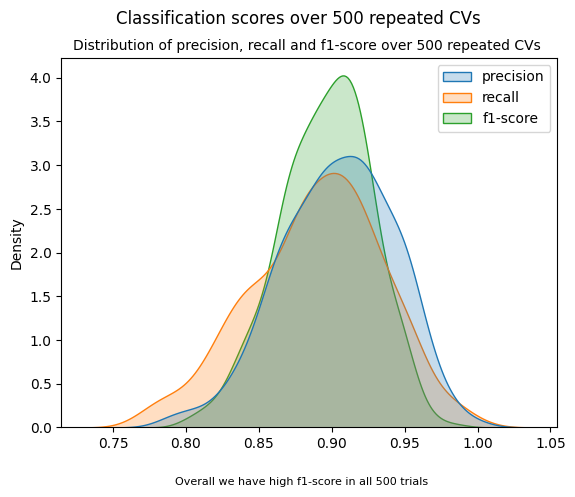

In [ ]:
# AUC distribution plots--500 in 500 repeated CVs (extratrees_catboost_enc)
_=sns.kdeplot(classwise_classification_scores[["precision", 	"recall", 	"f1-score"]], fill=True)
_=plt.suptitle("ExtraTrees-catencoded--Classification scores over 500 repeated CVs ", ha="center", fontsize=10)
_=plt.title("Distribution of precision, recall and f1-score over 500 repeated CVs ", ha="center", fontsize=8)
_=plt.figtext(0.5, -0.01, "Overall we have high f1-score in all 500 trials",
              ha="center",
              fontsize=8)
_=plt.show()

## Comparing two models
 Box plots of accuracy distributions for ExtraTrees vs ExtraTrees-catencoded

In [ ]:
# Prepare dataframes for plotting
df_melted = pd.melt(acc_array[
                               ['extratrees',
                               'extratrees_catboost_enc']
                              ],
                     var_name='Feature',
                     value_name='Value'
                     )
df_melted.head(2)
df_melted.tail(2)

,Feature,Value
0,extratrees,0.90
1,extratrees,0.92


,Feature,Value
998,extratrees_catboost_enc,0.914573
999,extratrees_catboost_enc,0.934673


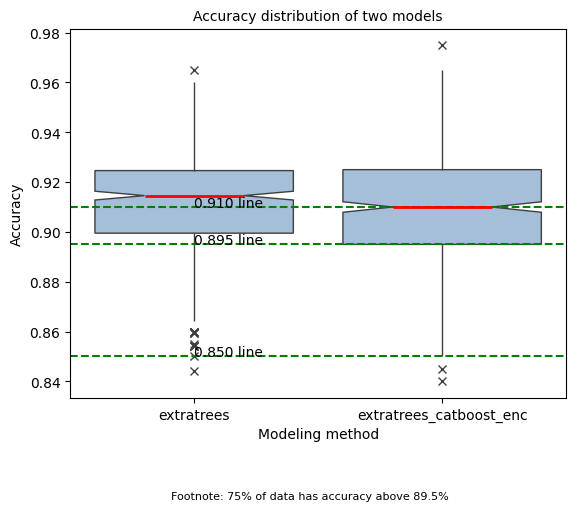

In [ ]:
# Create the boxplots
ax=sns.boxplot(
            data=df_melted, x="Feature",
            y = "Value",
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.3, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 2},
            )
_=ax.set(xlabel='Modeling method', ylabel='Accuracy')
_=ax.axhline(y=0.85, color='g', linestyle='--')
_=ax.axhline(y=0.91, color='g', linestyle='--')
_=ax.axhline(y=0.895, color='g', linestyle='--')  # 75% obs above this line
_=ax.text(0.0,0.895, "0.895 line")
_=ax.text(0.0,0.850, "0.850 line")
_=ax.text(0.0,0.910, "0.910 line")
_=plt.title("Accuracy distribution of two models", ha="center", fontsize=10)
_=plt.figtext(0.5, -0.1, "Footnote: 75% of data has accuracy above 89.5%", ha="center", fontsize=8)
plt.show()

### Density plots of accuracy

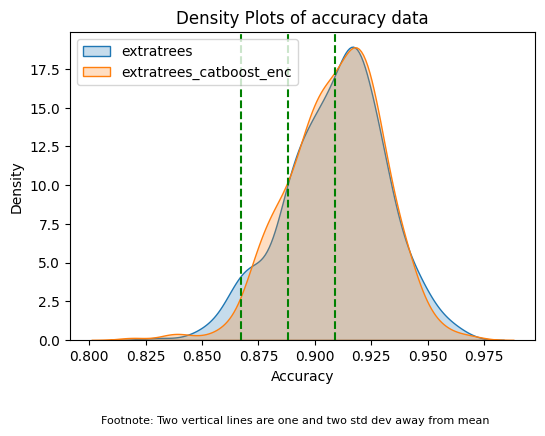

In [ ]:
# Choose the features you want to plot
features = ['extratrees', 'extratrees_catboost_enc']

_=plt.figure(figsize=(6,4))
for feature in features:
    _=sns.kdeplot(acc_array[feature], fill=True, label=feature)

_=plt.title('ExtraTrees vs ExtraTrees-catencoded--Density Plots of accuracy data',fontsize =10 )
_=plt.xlabel('Accuracy')
_=plt.ylabel('Density')
std = np.std(acc_array["extratrees_catboost_enc"])
mean = np.mean(acc_array["extratrees_catboost_enc"])
_=plt.axvline(x= mean - std * 1, color='g', linestyle='--')
_=plt.axvline(x= mean - std * 2, color='g', linestyle='--')
_=plt.axvline(x= mean , color='g', linestyle='--')
_=plt.figtext(0.5, -0.1, "Footnote: Two vertical lines are one and two std dev away from mean",
              ha="center",
              fontsize=8)

_=plt.legend()
_=plt.show()